In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('data_stocks.csv')

In [4]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [12]:
df.drop(['DATE'],axis=1,inplace=True)

In [13]:
df.shape

(41266, 501)

In [14]:
df.describe()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,41.690000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,43.650000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,44.935000,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,47.830000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [15]:
df.isnull().sum()

SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
NASDAQ.ADI     0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 501, dtype: int64

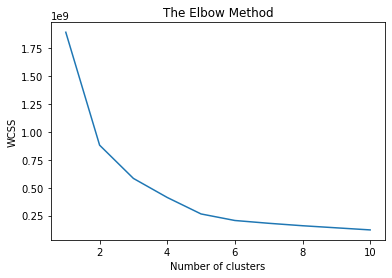

In [16]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we see that the number of clusters are 4

In [18]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [20]:
df[y_kmeans==0]

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
21193,2447.6201,48.950,145.990,141.565,80.3700,103.25,105.035,49.140,119.610,44.0800,...,103.24,91.9500,47.715,44.1600,81.5550,28.580,53.9100,73.9400,127.310,63.540
21194,2447.5701,48.925,145.980,141.590,80.3300,103.27,104.990,49.155,119.520,44.0300,...,103.25,91.9100,47.710,44.1400,81.5700,28.590,53.9050,73.9250,127.360,63.530
21195,2447.6599,48.920,145.950,141.510,80.3100,103.31,104.900,49.150,119.590,44.0000,...,103.26,91.9700,47.715,44.1600,81.5600,28.580,53.9050,73.8600,127.360,63.545
21196,2447.3799,48.940,145.925,141.635,80.2700,103.32,104.830,49.150,119.898,43.9707,...,103.29,91.9700,47.690,44.1501,81.5750,28.575,53.9358,73.8000,127.310,63.560
21197,2447.3501,48.880,145.848,141.550,80.1786,103.28,104.880,49.140,119.975,43.9700,...,103.25,91.9611,47.700,44.1500,81.6059,28.575,53.9250,73.7800,127.250,63.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34614,2473.0500,49.985,159.850,147.770,78.9400,108.34,108.270,47.245,135.840,43.8800,...,100.85,93.9600,48.410,44.2650,79.8800,32.270,59.7900,74.2000,114.985,59.870
34615,2473.7700,49.980,159.885,147.730,78.9150,108.33,108.250,47.270,135.870,43.8700,...,100.92,94.0100,48.410,44.2700,79.8800,32.270,59.7750,74.1650,114.940,59.800
34616,2474.3101,50.000,159.990,147.845,78.9200,108.56,108.320,47.285,135.990,43.8900,...,100.91,93.9750,48.420,44.2900,79.9050,32.275,59.7850,74.1600,114.920,59.920
34617,2474.8601,50.010,159.970,147.790,78.9700,108.48,108.310,47.255,136.000,43.9200,...,100.93,94.0500,48.440,44.2900,79.9250,32.310,59.8200,74.2000,114.930,59.940


In [21]:
df[y_kmeans==1]

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,38.99,...,84.370,119.035,44.400,39.880,82.030,7.360,50.22,63.8600,122.000,53.350
1,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,39.01,...,84.370,119.035,44.110,39.880,82.030,7.380,50.22,63.7400,121.770,53.350
2,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,38.91,...,84.585,119.260,44.090,39.980,82.020,7.360,50.12,63.7500,121.700,53.365
3,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,38.84,...,84.460,119.260,44.250,39.990,82.020,7.350,50.16,63.8800,121.700,53.380
4,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,38.93,...,84.470,119.610,44.110,39.960,82.030,7.360,50.20,63.9100,121.695,53.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,2387.8000,44.0100,143.7000,133.2700,77.790,105.0800,90.5000,59.700,126.785,41.32,...,95.900,116.680,45.120,42.915,81.145,7.110,51.60,65.9400,118.250,56.440
7034,2387.6499,44.0600,143.7000,133.3200,77.790,105.0700,90.5200,59.695,126.840,41.31,...,95.805,116.715,45.120,42.880,81.200,7.110,51.59,65.9450,118.190,56.420
7035,2388.4900,43.9600,143.5699,133.3500,77.770,105.0700,90.4900,59.690,127.010,41.30,...,95.830,116.710,45.090,42.875,81.205,7.115,51.58,65.9475,118.225,56.430
7036,2388.9900,43.9750,143.6600,133.3700,77.800,105.1400,90.5400,59.695,126.820,41.31,...,95.860,116.610,45.130,42.915,81.205,7.110,51.61,65.9850,118.240,56.475


In [22]:
df[y_kmeans==2]

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
7038,2390.9600,44.020,144.00,133.39,77.950,105.180,90.7700,59.75,127.790,41.200,...,95.550,116.66,45.14,42.910,82.450,7.130,51.66,65.80,117.750,56.45
7039,2390.8401,43.930,143.82,133.48,77.755,104.880,90.5700,59.78,127.730,41.250,...,95.335,117.74,45.16,42.820,82.320,7.120,51.63,65.73,118.070,56.45
7040,2390.5100,43.550,143.64,133.31,77.730,104.810,90.7000,59.76,127.640,41.300,...,95.460,117.00,45.12,42.740,82.266,7.130,51.63,65.58,117.450,56.52
7041,2389.8701,43.390,143.78,133.27,77.685,104.620,90.4500,59.72,127.815,41.260,...,95.190,116.78,45.13,42.780,82.240,7.125,51.48,65.70,117.805,56.58
7042,2389.8000,43.220,143.81,133.29,77.640,104.710,90.3800,59.70,128.350,41.130,...,95.340,116.73,45.12,42.800,82.100,7.100,51.48,65.71,117.680,56.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24833,2432.7300,50.550,143.49,138.61,76.330,102.755,99.6400,50.16,121.490,41.120,...,100.965,97.00,45.67,44.600,82.360,28.900,55.56,73.64,128.490,62.69
24834,2433.1001,50.550,143.57,138.59,76.310,102.760,99.7636,50.17,121.455,41.125,...,100.980,96.92,45.69,44.605,82.345,28.870,55.57,73.64,128.530,62.70
24841,2430.2100,50.435,143.52,138.62,76.220,102.530,99.5400,50.15,121.100,41.110,...,100.840,96.88,45.63,44.510,82.190,28.860,55.54,73.40,128.520,62.70
24842,2428.8101,50.430,143.47,138.42,76.180,102.510,99.4500,50.13,121.110,41.070,...,100.840,96.89,45.62,44.510,82.155,28.855,55.51,73.36,128.520,62.69


In [25]:
df[y_kmeans==3]

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
34619,2465.4399,49.7400,159.25,146.680,78.50,108.510,107.740,47.1800,136.0800,43.2400,...,100.420,93.5000,48.560,44.280,80.2900,32.020,59.830,74.13,113.95,60.0000
34620,2464.7400,49.6400,159.71,146.860,78.36,108.610,106.980,47.3295,135.6100,43.2001,...,100.420,92.1750,48.530,44.155,80.2700,31.990,59.900,73.77,113.72,60.2416
34621,2465.5701,49.5271,159.86,146.560,78.14,108.860,106.660,47.3400,135.6601,43.1650,...,100.430,92.7800,48.490,44.210,80.2073,32.030,59.900,74.08,113.93,60.1200
34622,2467.8401,49.4950,159.64,146.660,78.21,108.650,107.015,47.2800,135.7800,43.4101,...,100.450,95.1299,48.460,44.210,80.1300,32.050,59.900,74.04,113.97,59.8700
34623,2468.0901,49.2800,159.86,146.700,78.23,108.670,107.330,47.2700,136.0200,43.6200,...,100.570,96.0700,48.480,44.210,80.1930,32.050,59.890,73.81,113.94,59.8694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,2472.2200,44.7200,164.11,155.090,83.67,106.565,114.490,47.1500,142.4250,45.1300,...,99.675,99.5300,49.485,40.955,76.3600,32.285,62.110,76.88,114.31,62.7250
41262,2471.7700,44.7300,164.12,155.160,83.65,106.590,114.520,47.1500,142.4500,45.1300,...,99.730,99.6300,49.480,40.960,76.3700,32.295,62.100,76.90,114.33,62.7100
41263,2470.0300,44.7400,164.01,155.065,83.62,106.520,114.470,47.1500,142.3300,45.1350,...,99.735,99.6400,49.495,40.940,76.3150,32.290,62.090,76.88,114.31,62.6850
41264,2471.4900,44.7100,163.88,154.960,83.58,106.400,114.330,47.1350,142.1700,45.0650,...,99.700,99.6300,49.485,40.925,76.3000,32.275,62.075,76.83,114.23,62.6301
